In [1]:
from nbindex import floating
floating.tableofcontent()

## Pandas - load data, create mask, and sorting

<img src="data/city.jpg" width=300/>
<br>

Let's load `data/cities.csv`! It is worth to take a peek into the file in a text editor befor loading it! This file contains the coordinates of all the cities with more citizens than 15.000.

Try to find all of the cities in Europe, that have more citizens than 2.000.000! Then print the sorted ascending by population size!

Let's us the following rectangle to define the coordinates for Europe:
* (longitude, latitude): (-20.2, 34.5) and (42.7, 72.4)

### Solution

In [1]:
import pandas as pd

In [2]:
datafile="data/cities.csv"

In [3]:
# Check the first few lines with the head bash command
!head $datafile

id#name#lon#lat#country#population
3040051#les Escaldes#1.53414#42.507290000000005#AD#15853
3041563#Andorra la Vella#1.52109#42.50779#AD#20430
290594#Umm al Qaywayn#55.55517#25.564729999999997#AE#44411
291074#Ras al-Khaimah#55.9432#25.78953#AE#115949
291696#Khawr Fakkan#56.34199#25.33132#AE#33575
292223#Dubai#55.17128#25.0657#AE#1137347
292231#Dibba Al-Fujairah#56.261759999999995#25.59246#AE#30000
292239#Dibba Al-Hisn#56.272909999999996#25.61955#AE#26395
292672#Sharjah#55.41206#25.33737#AE#543733


In [8]:
linkdf=pd.read_csv(darafile,sep="#")
df.head()

,id,name,lon,lat,country,population
0,3040051,les Escaldes,1.53414,42.50729,AD,15853
1,3041563,Andorra la Vella,1.52109,42.50779,AD,20430
2,290594,Umm al Qaywayn,55.55517,25.56473,AE,44411
3,291074,Ras al-Khaimah,55.94320,25.78953,AE,115949
4,291696,Khawr Fakkan,56.34199,25.33132,AE,33575


In [9]:
df.describe()

,id,lon,lat,population
count,2.311500e+04,23115.000000,23115.000000,2.311500e+04
mean,2.568804e+06,16.135652,27.592370,1.158813e+05
std,1.688010e+06,70.979961,23.013907,4.822108e+05
min,1.425600e+04,-176.174530,-54.800000,0.000000e+00
25%,1.266034e+06,-43.793750,14.785295,2.201800e+04
50%,2.474583e+06,16.051670,34.106680,3.579100e+04
75%,3.461174e+06,75.218695,44.698005,7.520300e+04
max,1.142868e+07,179.364510,78.223340,2.231547e+07


In [10]:
df.shape

(23115, 6)

In [11]:
mask=((df["lon"]>-20.2) & (df["lon"]<42.7) & (df["lat"]>34.5) & (df["lat"]<72.4) & (df["population"]>2000000))

df[mask].sort_values(by="population",ascending=False)

,id,name,lon,lat,country,population
19119,745044,Istanbul,28.94966,41.01384,TR,11174257
17261,524901,Moscow,37.61556,55.75222,RU,10381222
7539,2643741,City of London,-0.09184,51.51279,GB,7556900
7540,2643743,London,-0.12574,51.50853,GB,7556900
17090,498817,Saint Petersburg,30.31413,59.93863,RU,5028000
19028,323786,Ankara,32.85427,39.91987,TR,3517182
5224,2950159,Berlin,13.41053,52.52437,DE,3426354
6338,3117735,Madrid,-3.70256,40.41650,ES,3255944
19555,703448,Kiev,30.52380,50.45466,UA,2797553
18939,311046,Izmir,27.13838,38.41273,TR,2500603


## Pandas - Load data, averages

- Load the `data/T_adat.csv` file into a pandas Dataframe, and then calculate the average for each year and plot it.

- Load `data/co2_adat.txt` as pandas DataFrame. The "#" character at beginning of the line are comments, which help to understand the listed data, but they are not part of the datatable itself. Plot the annual average $CO_2$ concentration as the fuction of time. 

<img src="data/co2em.png" width=350/>

### Solution

In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Read temperature

t = pd.read_csv('data/T_adat.csv',skiprows=1)

In [4]:
# average

t['av']=t[['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1,skipna=True)

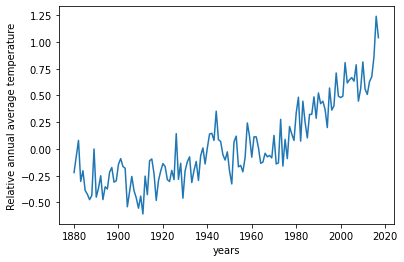

In [16]:
# plot

plot(t['Year'].values,t['av'].values)
plt.xlabel('years')
d=plt.ylabel('Relative annual average temperature')

In [6]:
# read CO_2 data

n=['y','mo','dec y','co2','interpolated','trend','#d']
co2=pd.read_csv('data/co2_adat.txt',delim_whitespace=True,comment='#',names=n)

In [7]:
# years and annual data

years = co2['y'].unique()
avgco2 = list(co2.groupby('y')['co2'].mean())

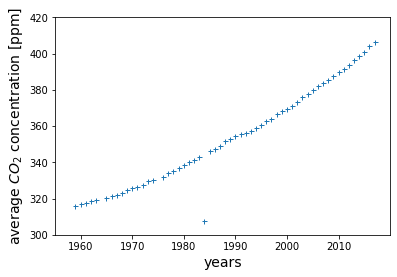

In [13]:
# plot

plot(years,avgco2, '+', markersize=5)
plt.xlabel('years', fontsize=14)
plt.ylabel(r'average $CO_2$ concentration [ppm]', fontsize=14)
d=plt.ylim(300,420)

## Pandas-Correlation

Compare two Dataframes! (from previous exercise `data/T_adat.csv` and `data/co2_adat.txt`)

- Merge the two Dataframes along the column that contains the years, and leave only those rows that contain value in both Dataframes.

- Take a look at the newly created Dataframe and, check how much the average temperature correlates with the average $CO_2$ concentration. Plot the average temperatures as the function of $CO_2$ concentration.

### Solution

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [11]:
# prepare DataFrames as before

t = pd.read_csv('data/T_adat.csv',skiprows=1)
t['av']=t[['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']].mean(axis=1,skipna=True)

n=['y','mo','dec y','co2','interpolated','trend','#d']
co2=pd.read_csv('data/co2_adat.txt',delim_whitespace=True,comment='#',names=n)
co2_simple = pd.DataFrame()
co2_simple['y'] = list(co2['y'].unique())
co2_simple['avg co2'] = list(co2.groupby('y')['co2'].mean())

In [12]:
# merge DataFrames

df=t.merge(co2_simple,how='inner',
             left_on='Year',
             right_on='y')

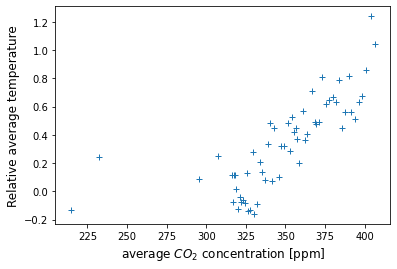

In [17]:
plot(df['avg co2'].values,df['av'].values, '+')
plt.xlabel(r'average $CO_2$ concentration [ppm]', fontsize=12)
d = plt.ylabel('Relative average temperature', fontsize=12)

In [18]:
print(r'Pearson-correlation coefficient between the annual average $CO_2$ concentration and the average temperature: ' 
      + str(df['avg co2'].corr(df['av'])))

Pearson-correlation coefficient between the annual average $CO_2$ concentration and the average temperature: 0.7608097596047623


## Still fossil fuel
The `fossil-fuel-co2-emissions-by-nation.csv` file contains the $CO_2$ emissions by burning fossil fuel of each country in the world in the last two centuries.

- With the help of the `pandas` module load the data into `DataFrames`!
- Calculate the total emission in 2014! Using the "Total" column, which were the top ten countries emitting $CO_2$?.
- Create a plot with the total emission of the 10 top polluters as the function of time  (column "Year")! 
- Create a plot with the emission of the Visegrad 4 countries (Hungary, Slovakia, Czech Republic, Poland), where you separate the "Solid Fuel", "Liquid Fuel" and "Gas Fuel" columns. 


### Solution

In [1]:
%pylab inline
import pandas as pd
import ipywidgets as ipw

Populating the interactive namespace from numpy and matplotlib


In [2]:
dat=pd.read_csv('data/fossil-fuel-co2-emissions-by-nation.csv')

In [3]:
# find the ten most poluting countries
ten_polluters = dat[dat['Year'] == 2014][['Country','Total']].sort_values(
               by = 'Total',ascending = False)[:10]['Country'].values

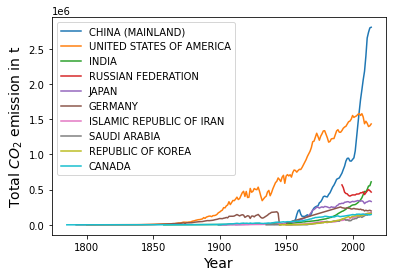

In [8]:
# solution 1
for c in ten_polluters:
    dat[dat['Country']==c].plot('Year','Total',label=c,ax=gca())
xlabel('Year', fontsize=14)
ylabel('Total $CO_2$ emission in t', fontsize=14);

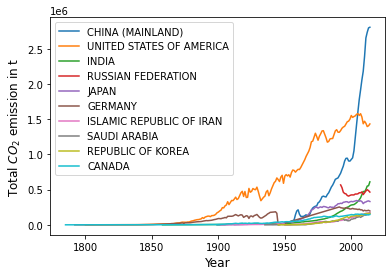

In [6]:
# solution 2
for c in ten_polluters:
    plot(dat[dat['Country']==c]['Year'],
         dat[dat['Country']==c]['Total'],label=c)
legend()
xlabel('Year', fontsize=14)
ylabel('Total $CO_2$ emission in t', fontsize=14);

In 2005 Chína was the largest polluter in the world!

In [19]:
# helper function 
def play(country,**kwargs):
    dat.groupby('Country').get_group(country).plot('Year',['Solid Fuel','Liquid Fuel','Gas Fuel'],**kwargs) # Create DataFrame from a group
    ylabel(r'$CO_2$ emission in t');
    title(country)

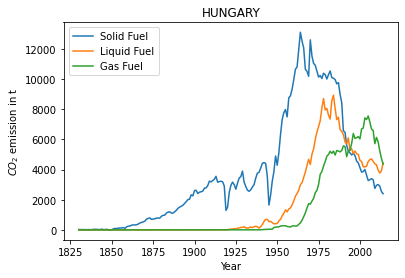

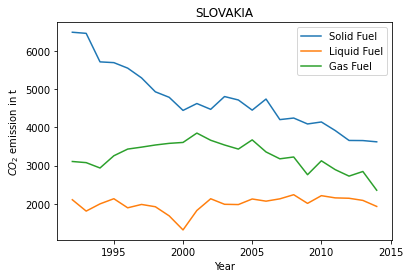

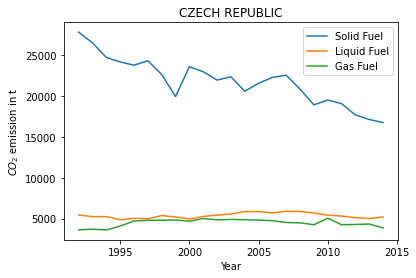

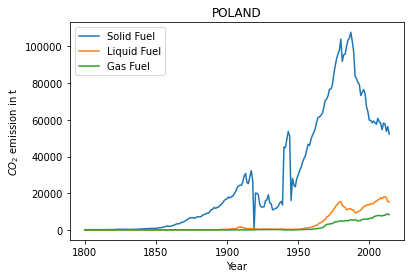

In [20]:
play('HUNGARY')
play('SLOVAKIA')
play('CZECH REPUBLIC')
play('POLAND')

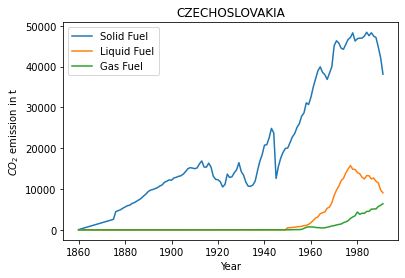

In [21]:
#Miising years from previous plots
play('CZECHOSLOVAKIA')